# Building an Imaga Classifier Using the Sequential API

### Data: Fashion MNIST

In [1]:
import os
import sys

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline

In [5]:
print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.6.0
Keras version:  2.6.0


In [6]:
#import data (fashion mnist)
fashion_mnist = keras.datasets.fashion_mnist

#data is already split into training and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
#shape and data type
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

**I am going to train the neural network using <font color="red">Gradient Descent</font>, I need to scale the input features (0 to 1) by deviding them by 255.0.**

In [8]:
#scale the input features
x_train = x_train / 255.0  # for simplicity

#validation and training sets
x_val, x_train = x_train[:5000], x_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

x_test = x_test / 255.0

In [9]:
# list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boot"]

'Coat'

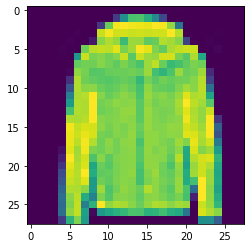

In [11]:
#plot 
plt.imshow(x_train[0]);
class_names[y_train[0]]

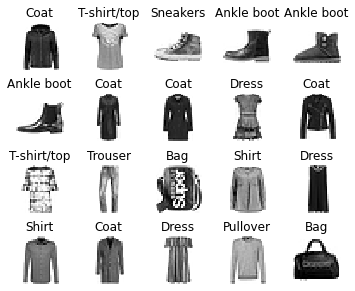

In [53]:
#plot first 20 items
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col  #5*0+0...=0 to 4; 5*1+0...=5 to 9;...
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

### Creating a model using the Sequential API
**Classification MLP (Multilayer Perceptron) with two hidden layers.**

In [54]:
#set the seed
np.random.seed(42)
tf.random.set_seed(42)

#clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown
tf.keras.backend.clear_session()

#model
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

**Code above:**
* **<font color="blue">Sequential([...])</font> : create a sequential model, composed of a single stack of layers connected sequentially.**
* **<font color="blue">InputLayer(input_shape=(28,28)</font> : specify the input_shape in the first layer in the model, which <font color="red">doesn’t include the batch size, only the shape of the instances</font>.**
* **<font color="blue">Flatten()</font> : convert each input image into a 1D array: if it receives input <font color="red">X</font>, it computes <font color="red">X.rechape(-1. 1)</font>**
* **<font color="blue">Dense(300, activation="relu")</font> : add a hidden layer with <font color="red">300</font> neurons. Use <font color="red">ReLu (Rectified Linear Unit Function)</font>.**
* **<font color="blue">Dense(100, activation="relu")</font> : add a hidden layer with <font color="red">100</font> neurons. Use <font color="red">ReLu (Rectified Linear Unit Function)</font>.**
* **<font color="blue">Dense(300, activation="softmax")</font> : add <font color="red">10</font> neurons (one per class). Use <font color="red">softmax activation function</font>.**

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**Model Above:**
The first hidden layer has (28*28=784) 784 * 300 connetion weights plus 300 bias, which equals to 235,500 parameters. This give a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting (especialy when there is not a lot of data)

In [56]:
# get the model's list of layers
model.layers

In [57]:
# get layer by its index
hidden1 = model.layers[1]
print(f"{hidden1.name}")

# get layer by its name
model.get_layer("dense") is hidden1

dense


True

**All the paramaters can be accessed using <font color="red">get_weights()</font> and <font color="red">set_weights()</font> method. For a <font color="blue">Dense</font> layer, this inclouds both the connection weight and the bias terms.**

**The <font color="blue">Dense</font> layer initializes the connection weights randomly, which is needed to break symmetry.**

In [58]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [59]:
weights.shape

(784, 300)

In [60]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
biases.shape

(300,)

### Compiling the model

**After a model is created, call its <font color="red">compile()</font> method to specify the loss function and the optimizer to us (optionally a list of metrics to compute durinfg training and evaluation)**

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**Code above:**
* **<font color="blue">"loss="sparse_categorical_crossentropy"</font> : <font color="red">"sparse_categorical_crossentropy"</font> for sparese labels (there are target class index from 0 to 9), and the classes are exlusive. If instead there was one target probability (like a ont-hot vectorto represent only one class like 3), than we need <font color="red">"categorical_crossentropy"</font>. Finally, if its a binary classification (with one or more binary lables), than we use <font color="red">"binary_crossentropy"</font> and <font color="red">"sigmoid"</font> activation function instead of <font color="red">"softmax"</font>**
* **<font color="blue">"optimizer="sgd""</font> : means that the model will train using simple <font color="red">STOCHASTIC GRADIENT DESCENT</font>**
* **<font color="blue">metrics=["accuracy"]</font> : since its a c;assifier, measure <font color="red">"accuracy</font>**

In [63]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [64]:
# convert sparse labels (i.e., class indices) to one-hot vector labels
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
np.argmax(keras.utils.to_categorical(y_train), axis=1)

array([4, 0, 7, ..., 3, 0, 5], dtype=int64)

### Training and evaluating the model

**To train the model call the <font color="red">fit()</font> method**

In [66]:
history = model.fit(x_train, y_train, epochs=30,
                     validation_data=(x_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - val_accuracy:

* **Pass in input feature <font color="red">x_train</font> and target class <font color="red">y_train</font>**
* **<font color="blue">epochs</font> : number of epochs to train (default is 1, usually not enough to converge to a good solution)**
* **Keras measures the loss and the extra metrics on the set at the end of each epoch, its usefull to see how well the model performs.** 

**<font color="green">If the performance of the training set is much better than the validation set, the model is probably overfitting the training set or there is a bug (e.g. data mismatch between the training and the validation set)</font>**

* Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, <font color="red">validation_split=0.1</font> tells Keras to use the last 10% of the data (before shuffling) for validation.

* **If the training set was very skewed,** with some classes being overrepresented and others underrepresented, it would be useful to set the argument when calling the <font color="blue">fit()</font> method, **which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.**

* If you need per-instance weights, set the argument (if both class_weight and sample_weight are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

In [71]:
# saving the model
model.save("models/fashion_MNIST.h5")

In [72]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [75]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [76]:
model.metrics_names

['loss', 'accuracy']

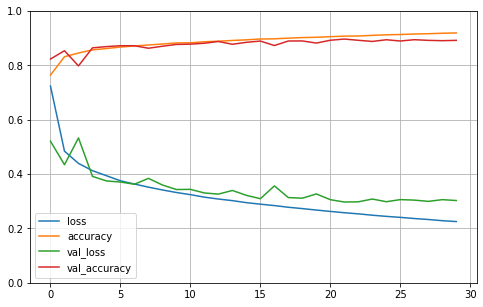

In [73]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0,1]
plt.show();

In [77]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3361 - accuracy: 0.8834


[0.3360535800457001, 0.883400022983551]

### Using the model to make predictions
**Call the <font color="red">predict()</font> method to make predictions on new instances**

In [78]:
# we don't have new instances so take the first 3 from the test set
x_new = x_test[:3]

# predict
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**For each instance the model estimates one probability per class, from 0 to 9 (e.g. the first image it estimates that the probability of class 9 'ankle boot' is 96%. I bealives that the first image is 'ankle boot'.**  

In [82]:
# show the class with the highest estimated probability
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

In [88]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

'Ankle boot'

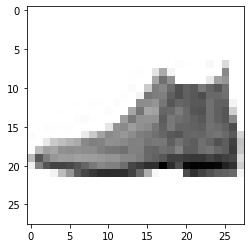

In [95]:
#check the 1st prediction
plt.imshow(x_new[0], cmap="binary");
np.array(class_names)[9]

'Pullover'

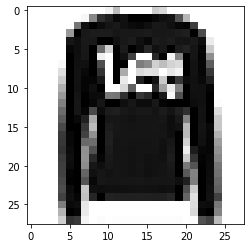

In [96]:
#check the 2nd prediction
plt.imshow(x_new[1], cmap="binary");
np.array(class_names)[2]

'Trouser'

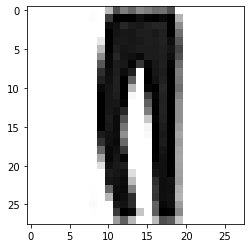

In [97]:
# check the 3rd prediction
plt.imshow(x_new[2], cmap="binary");
np.array(class_names)[1]